In [71]:
from fastai.vision import *
import urllib.request

# View Data

In [50]:
root_data_dest = Path('data/')

In [51]:
np.random.seed(42)
data = ImageDataBunch.from_folder(root_data_dest, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4)
data = data.normalize(imagenet_stats)

In [52]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['elon-musk', 'tony-stark'], 2, 592, 148)

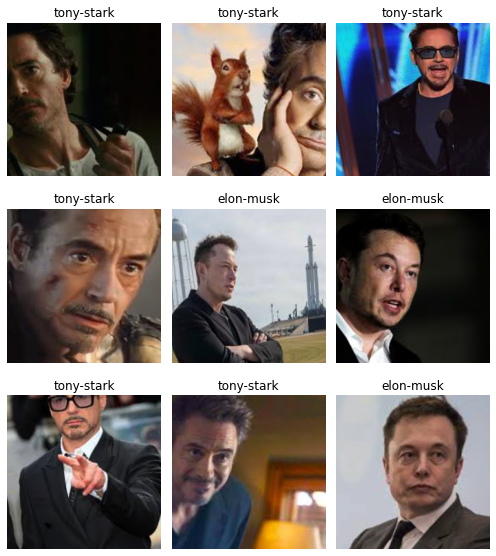

In [53]:
data.show_batch(rows=3, figsize=(7,8))

# Train data

In [54]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [55]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.800996,0.782052,0.189189,00:07
1,0.623334,0.377587,0.121622,00:05
2,0.478552,0.278791,0.108108,00:05
3,0.396597,0.254284,0.101351,00:05


In [56]:
learn.save('stage-1')

# Results

In [67]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

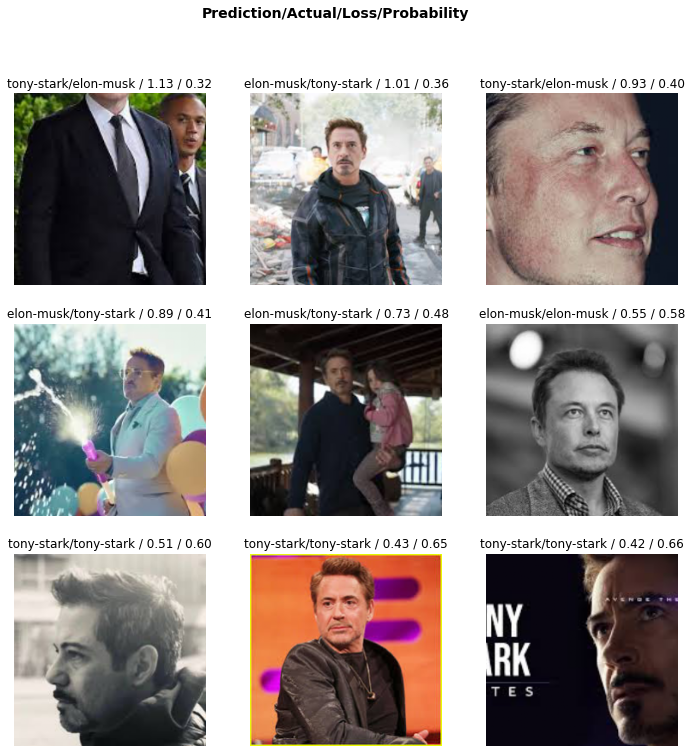

In [68]:
interp.plot_top_losses(9, figsize=(12,12))

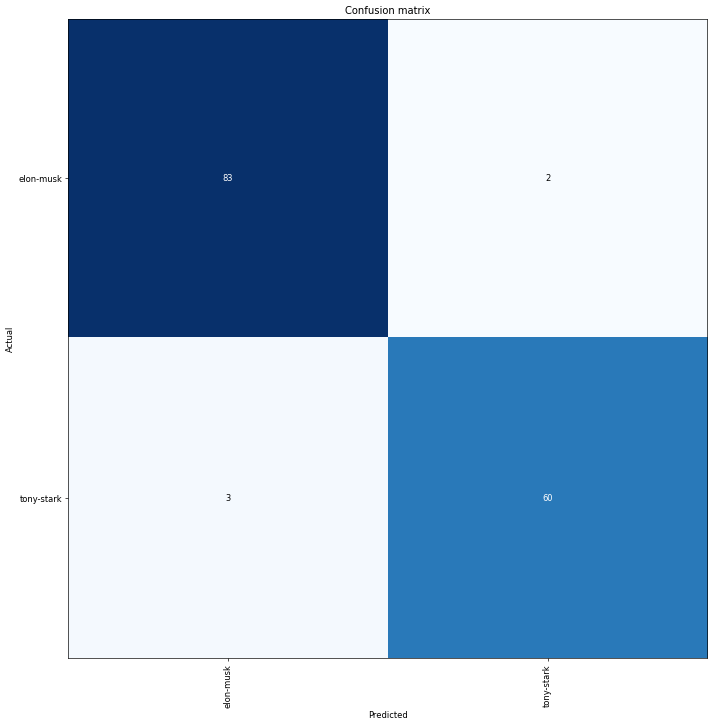

In [69]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Fine-tuning

In [60]:
learn.unfreeze()

In [61]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.401657,1.784418,0.229730,00:08


In [62]:
learn.load('stage-1');

In [63]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


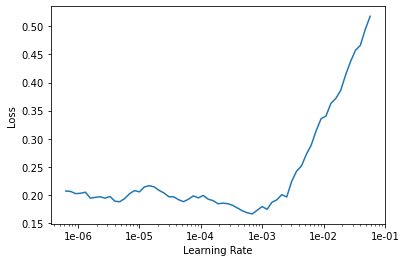

In [64]:
learn.recorder.plot()

In [65]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(10**(-3.5), 10**(-2.7)))

epoch,train_loss,valid_loss,error_rate,time
0,0.290335,0.594241,0.128378,00:07
1,0.280683,0.657867,0.108108,00:07
2,0.340405,2.504865,0.108108,00:07
3,0.301781,1.039234,0.114865,00:07
4,0.271772,1.246242,0.155405,00:06
5,0.240063,0.161540,0.040541,00:06
6,0.197554,0.100265,0.033784,00:07
7,0.170003,0.065567,0.027027,00:08
8,0.146264,0.056274,0.033784,00:08
9,0.127076,0.055680,0.033784,00:07


In [66]:
learn.save('stage-2')

# Test it!

In [83]:
model_path = "./data/"

In [84]:
classes = ["elon-musk", "tony-stark"]
data2 = ImageDataBunch.single_from_classes(model_path, classes, size=224).normalize(imagenet_stats)

In [87]:
learn2 = cnn_learner(data2, models.resnet50)
learn2.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    

In [91]:
urllib.request.urlretrieve("https://metro.co.uk/wp-content/uploads/2019/09/PRI_85670799.jpg?quality=90&strip=all", "test.jpg")
img = open_image("test.jpg")
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category tensor(1)